In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:09<00:00, 222MB/s]
100% 1.06G/1.06G [00:09<00:00, 116MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential()

# Adding an Input layer to define the input shape for the conv_base
model.add(keras.Input(shape=(150,150,3)))

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
conv_base.trainable = False

In [ ]:
from tensorflow.keras.preprocessing.image  import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 168s 248ms/step - accuracy: 0.8263 - loss: 0.4275 - val_accuracy: 0.9044 - val_loss: 0.2255
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 152s 241ms/step - accuracy: 0.8969 - loss: 0.2414 - val_accuracy: 0.9108 - val_loss: 0.2122
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 153s 242ms/step - accuracy: 0.9082 - loss: 0.2157 - val_accuracy: 0.9138 - val_loss: 0.2015
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 152s 241ms/step - accuracy: 0.9136 - loss: 0.2019 - val_accuracy: 0.9160 - val_loss: 0.1964
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 153s 242ms/step - accuracy: 0.9174 - loss: 0.1964 - val_accuracy: 0.9202 - val_loss: 0.1945
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 241ms/step - accuracy: 0.9211 - loss: 0.1892 - val_accuracy: 0.9202 - val_loss: 0.1889
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 206s 248ms/step - accuracy: 0.9234 - loss: 0.1812 - val_accuracy: 0.9188 - val_loss: 0.1915
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 197s 239ms/step - accuracy: 0.9235 - loss: 0.17

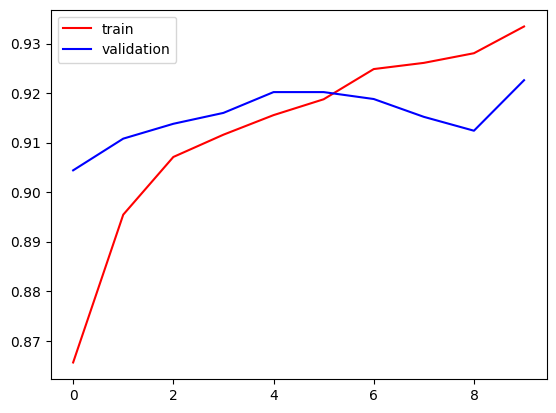

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

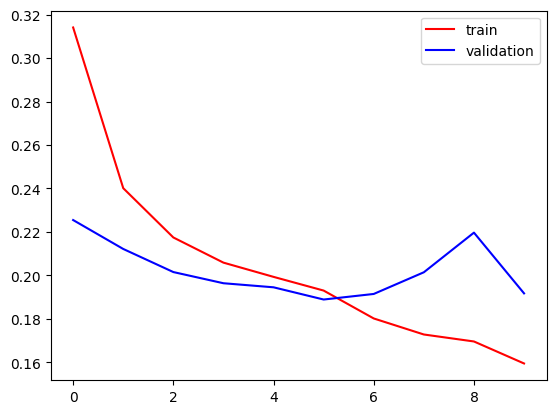

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()